In [1]:
# Projeto da disciplina IF816 2020.3 -  
# O objetivo é prever a progressão da epidemia da doença coronavírus (Covid-19) no estado de Pernambuco.

##  Introdução

Este projeto tem como objetivo mostrar como está a pandemia COVID-19 em Pernambuco e apresentar previsões de qual será a situação da pandemia no estado nas próximas semanas. No momento dia este projeto foi feito, o estado de Pernambuco, com uma população estimada de 9.616.621 pessoas, notificou 27235 casos confirmados de pessoas infectadas, 133.512 pessoas recuperadas e 8.438 mortos. O modelo matemático utilizado para as previsões utilizado é o SEIRD, S indicando o número de pessoas suscetíveis, I o número de pessoas infectadas, R o de recuperados, e D o número de mortes. Nas equações diferenciais utilizadas nas previsões, algumas constantes foram utilizadas, sendo elas β (taxa de infecção ), γ (probabilidade de recuperação), μ (taxa de letalidade), σ (taxa de indivíduos expostos). Vale lembrar que a pandemia COVID-19 é uma pandemia dinâmica, logo esses valores podem mudar drasticamente na medida que o tempo passa. Com todos os gráficos apresentados, que foram construídos a partir das simulações, e com as comparações que foram feitas das diferentes medidas possíveis que podem ser adotadas para o enfrentamento da pandemia, esse projeto levanta a discussão e aponta quantas vidas poderiam ter sido salvas se uma postura diferente tivesse sido adotada no enfrentamento a COVID-19..


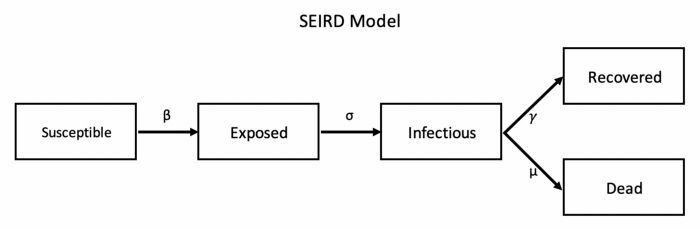

## Equações diferenciais do módelo SEIRD



\begin{align}
\frac{dS}{dt} = - \frac{\beta*S*I}{N}
\end{align}

\begin{align}
\frac{dE}{dt} =  \frac{\beta*S*I}{N} - \sigma*E
\end{align}

\begin{align}
\frac{dI}{dt} =  \sigma*E - \gamma*I - \mu*I
\end{align}

\begin{align}
\frac{dR}{dt} = \gamma*I
\end{align}

\begin{align}
\frac{dD}{dt} = \mu*I
\end{align}

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd

In [3]:
#Inicialização das variáveis
N = 9616621                  #Número de cidadãos pernambucanos
R0 = 133512                  #Número de pessoas recuperadas
D0 = 8324                    #Número de óbitos 
E0 =5158                     #Número de pessoas expostas ao vírus
I0 = 153299 - R0 - D0 - E0   #Número de pessoas infectadas
S0 = N - I0 - R0 - D0 - E0   #Número de pessoas suscetíveis
gamma = 1./10.               #Probabilidade de recuperação
beta = 0.94/10.0             #Taxa de infecção
sigma = 0.5                  #Taxa de probabilidade de ficar exposto
mu = 0.03                    #Taxa de letalidade
t = np.linspace(0, 160, 160)

In [4]:
#Implementação das equações diferenciais
def deriv(y, t, N, beta, sigma, gamma, mu):
    S, E, I, R, D = y
    dSdt = -beta*S*I/N
    dEdt = beta*S*I/N - sigma*E
    dIdt = sigma*E - gamma*I - mu*I
    dRdt = gamma*I
    dDdt = mu*I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [5]:
y0 = S0, E0, I0, R0, D0
ret = odeint(deriv, y0, t, args = (N, beta, sigma, gamma, mu))
S, E, I, R, D = ret.T


# Simulações feitas com os dados obtidos do site do governo de Pernambuco, em 10/10

## Gráfico do número de expostos!

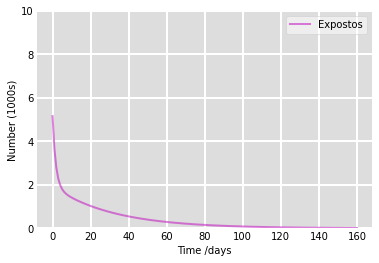

In [6]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, E/1000, 'm', alpha=0.5, lw=2, label='Expostos')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,10)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('expostos.png')
plt.show()

## Gráfico do número de Infectados!

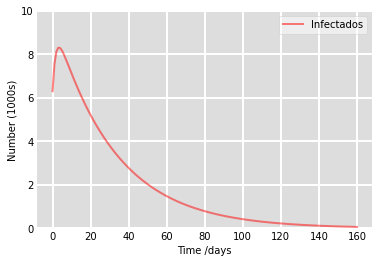

In [7]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infectados')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,10)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('sir.pdf')
plt.show()

## Gráfico de número de mortos

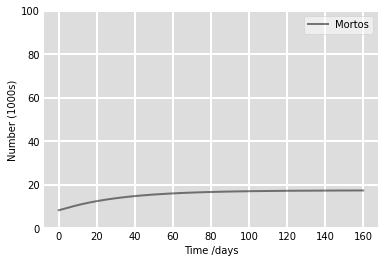

In [8]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, D/1000, 'k', alpha=0.5, lw=2, label='Mortos')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,100)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('mortos.png')
plt.show()

## Gráfico do número de Recuperados!

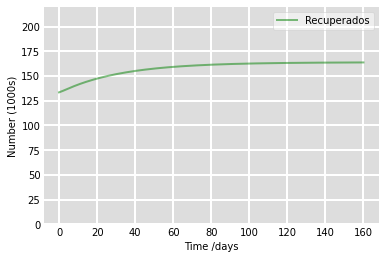

In [9]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,220)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('sir.pdf')
plt.show()

## Gráfico do número de Suscetíveis!

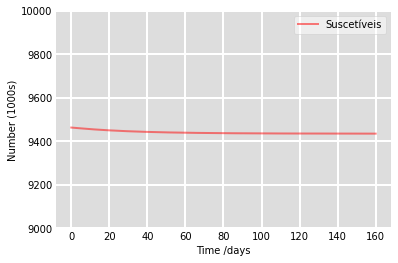

In [10]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'r', alpha=0.5, lw=2, label='Suscetíveis')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(9000,10000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('suscetiveis.png')
plt.show()

In [11]:
# Base Geral de Dados de casos de coronavírus em Pernambuco
dataFrameCovid19 = pd.read_csv("COVID-19 em Dados.csv")

# Base de dados da COVID-19 EM Pernambuco do dia 03/04/2020 até 08/11/2020

In [12]:
dataFrameCovid19

,dt_referencia,dt_atualizacao,confirmados,obitos,tx_obitos,recuperados,tx_recuperados,isolamento,tx_isolamento,enfermaria,tx_enfermaria,uti,tx_uti,testes_novos,testes_acumulados,tx_testes,leitos_uti,tx_oc_uti,leitos_enf,tc_oc_enf
0,2020-04-03,NaN,176,14,0.080,23,0.131,87,0.569,34,0.222,18,0.102,0,0,0,0,0.00,0,0.00
1,2020-04-04,NaN,201,21,0.104,25,0.124,87,0.494,49,0.278,19,0.094,0,0,0,0,0.00,0,0.00
2,2020-04-05,NaN,223,30,0.134,25,0.112,101,0.510,44,0.222,23,0.103,0,0,0,0,0.00,0,0.00
3,2020-04-06,NaN,352,34,0.097,32,0.091,166,0.519,94,0.294,26,0.074,0,0,0,0,0.00,0,0.00
4,2020-04-07,NaN,401,46,0.115,32,0.080,189,0.512,110,0.298,24,0.060,0,0,0,0,0.00,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2020-11-04,NaN,164222,8687,0.053,145804,0.888,71,0.004,950,0.052,78,0.000,5763,629638,65587,786,0.77,833,0.57
216,2020-11-05,NaN,165273,8711,0.053,146752,0.888,64,0.004,990,0.054,80,0.000,5766,635404,66188,786,0.79,833,0.55
217,2020-11-06,NaN,165922,8724,0.053,147528,0.889,70,0.004,965,0.052,79,0.000,6225,641629,66836,780,0.81,831,0.54
218,2020-11-07,NaN,166333,8732,0.052,147778,0.888,62,0.003,975,0.052,77,0.000,2883,644512,67137,780,0.82,831,0.55


## Taxas da COVID - 19 ao longo dos dias em Pernambuco

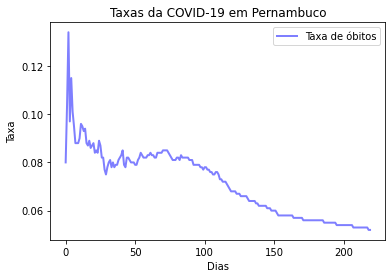

In [13]:
# plotando a taxa de óbitos 
plt.plot(dataFrameCovid19['tx_obitos'].index, dataFrameCovid19['tx_obitos'].values, 'b', alpha=0.5, lw=2, label='Taxa de óbitos')
plt.legend()
plt.xlabel('Dias') 
plt.ylabel('Taxa') 
plt.title('Taxas da COVID-19 em Pernambuco') 
plt.show() 
plt.savefig('óbtios.png')

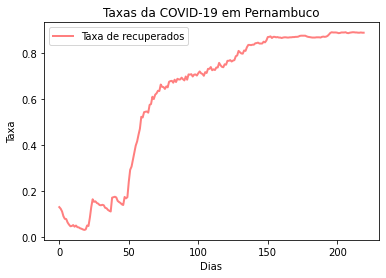

In [14]:
# plotando a taxa de recuperados  
plt.plot(dataFrameCovid19['tx_recuperados'].index, dataFrameCovid19['tx_recuperados'].values, 'r', alpha=0.5, lw=2, label='Taxa de recuperados')
plt.legend()
plt.xlabel('Dias') 
plt.ylabel('Taxa') 
plt.title('Taxas da COVID-19 em Pernambuco') 
plt.show() 
plt.savefig('recuperados.png')


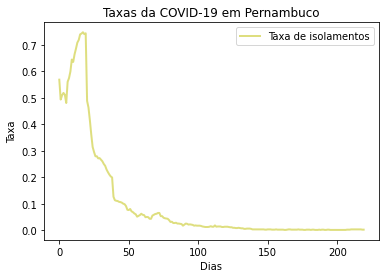

In [15]:
# plotando a taxa de isolamento 
plt.plot(dataFrameCovid19['tx_isolamento'].index, dataFrameCovid19['tx_isolamento'].values, 'y', alpha=0.5, lw=2, label='Taxa de isolamentos')
plt.legend()
plt.xlabel('Dias') 
plt.ylabel('Taxa') 
plt.title('Taxas da COVID-19 em Pernambuco') 
plt.show() 
plt.savefig('isolamento.png')

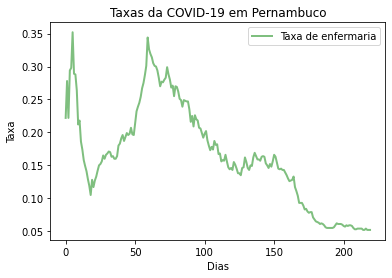

In [16]:
# plotando a taxa de enfermaria
plt.plot(dataFrameCovid19['tx_enfermaria'].index, dataFrameCovid19['tx_enfermaria'].values, 'g', alpha=0.5, lw=2, label='Taxa de enfermaria')
plt.legend()
plt.xlabel('Dias') 
plt.ylabel('Taxa') 
plt.title('Taxas da COVID-19 em Pernambuco') 
plt.show() 
plt.savefig('taxa_enfermaria.png')

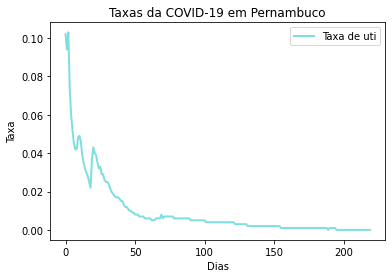

In [17]:
# plotando a taxa de uti
plt.plot(dataFrameCovid19['tx_uti'].index, dataFrameCovid19['tx_uti'].values, 'c', alpha=0.5, lw=2, label='Taxa de uti')
plt.legend()
plt.xlabel('Dias') 
plt.ylabel('Taxa') 
plt.title('Taxas da COVID-19 em Pernambuco') 
plt.show() 
plt.savefig('taxa_uti.png')


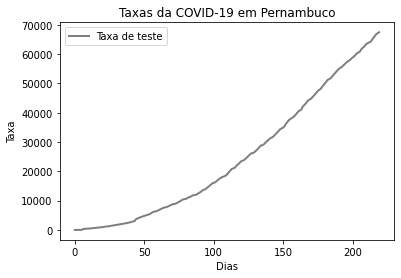

In [18]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['tx_testes'].index, dataFrameCovid19['tx_testes'].values, 'k', alpha=0.5, lw=2, label='Taxa de teste')
plt.legend()
plt.xlabel('Dias') 
plt.ylabel('Taxa') 
plt.title('Taxas da COVID-19 em Pernambuco') 
plt.show() 
plt.savefig('taxa_testes.png')

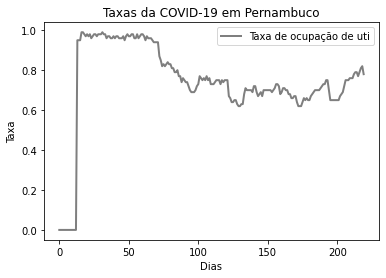

In [19]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['tx_oc_uti'].index, dataFrameCovid19['tx_oc_uti'].values, 'b', alpha=0.5, lw=2, label='Taxa de ocupação de uti')
plt.legend()
plt.xlabel('Dias') 
plt.ylabel('Taxa') 
plt.title('Taxas da COVID-19 em Pernambuco') 
plt.show() 
plt.savefig('tx_oc_uti.png')

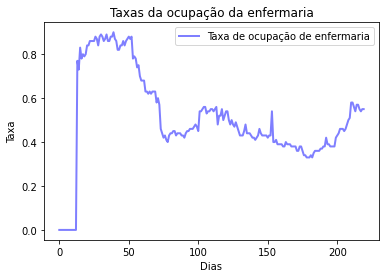

In [41]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['tc_oc_enf'].index, dataFrameCovid19['tc_oc_enf'].values, 'b', alpha=0.5, lw=2, label='Taxa de ocupação de enfermaria')
plt.legend()
plt.xlabel('Dias') 
plt.ylabel('Taxa') 
plt.title('Taxas da ocupação da enfermaria') 
plt.show() 
plt.savefig('tc_oc_enf.png')

## Agora usaremos dados fornecidos pelo governo para analisar o que aconteceu ao longo das últimas semanas

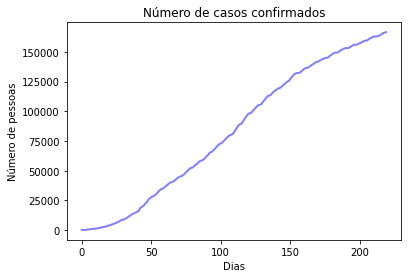

In [30]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['confirmados'].index, dataFrameCovid19['confirmados'].values, 'g', alpha=0.5, lw=2)
plt.xlabel('Dias') 
plt.ylabel('Número de pessoas') 
plt.title('Número de casos confirmados') 
plt.show() 
plt.savefig('confirmados.png')

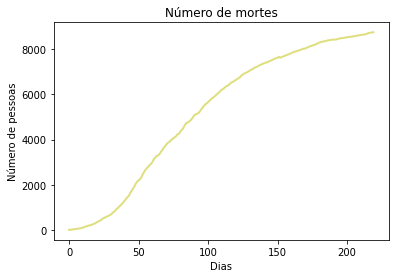

In [35]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['obitos'].index, dataFrameCovid19['obitos'].values, 'y', alpha=0.5, lw=2)
plt.xlabel('Dias') 
plt.ylabel('Número de pessoas') 
plt.title('Número de mortes') 
plt.show() 
plt.savefig('r_obitos.png')

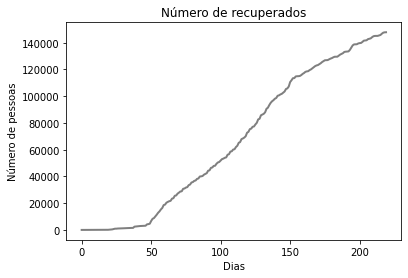

In [31]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['recuperados'].index, dataFrameCovid19['recuperados'].values, 'k', alpha=0.5, lw=2)
plt.xlabel('Dias') 
plt.ylabel('Número de pessoas') 
plt.title('Número de recuperados') 
plt.show() 
plt.savefig('r_recuperados')

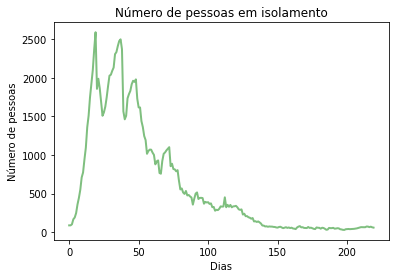

In [36]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['isolamento'].index, dataFrameCovid19['isolamento'].values, 'g', alpha=0.5, lw=2)
plt.xlabel('Dias') 
plt.ylabel('Número de pessoas') 
plt.title('Número de pessoas em isolamento') 
plt.show() 
plt.savefig('r_isolamento')

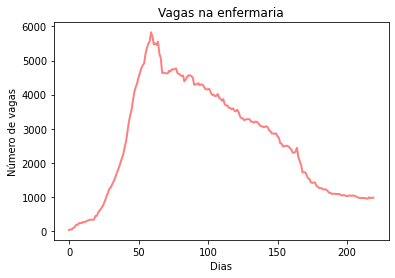

In [42]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['enfermaria'].index, dataFrameCovid19['enfermaria'].values, 'r', alpha=0.5, lw=2)
plt.xlabel('Dias') 
plt.ylabel('Número de vagas') 
plt.title('Vagas na enfermaria') 
plt.show() 
plt.savefig('r_enfermaria')

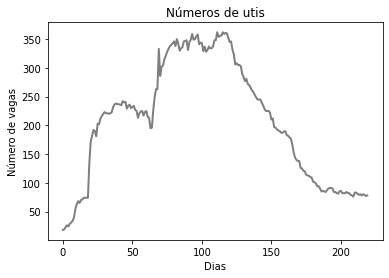

In [37]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['uti'].index, dataFrameCovid19['uti'].values, 'k', alpha=0.5, lw=2)
plt.xlabel('Dias') 
plt.ylabel('Número de vagas') 
plt.title('Números de utis') 
plt.show() 
plt.savefig('r_uti')

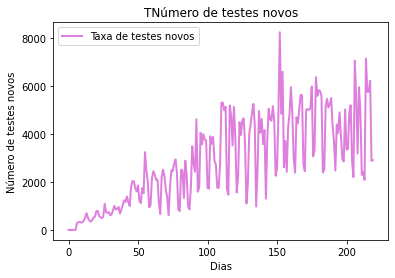

In [44]:
# plotando a taxa de uti
plt.plot(dataFrameCovid19['testes_novos'].index, dataFrameCovid19['testes_novos'].values, 'm', alpha=0.5, lw=2, label='Taxa de testes novos')
plt.legend()
plt.xlabel('Dias') 
plt.ylabel('Número de testes novos') 
plt.title('TNúmero de testes novos') 
plt.show() 
plt.savefig('r_testes_novos.png')

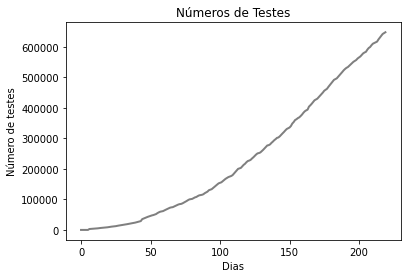

In [39]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['testes_acumulados'].index, dataFrameCovid19['testes_acumulados'].values, 'b', alpha=0.5, lw=2)
plt.xlabel('Dias') 
plt.ylabel('Número de testes') 
plt.title('Números de Testes') 
plt.show() 


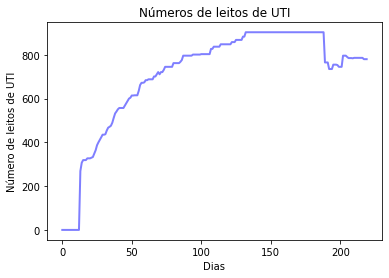

In [40]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['leitos_uti'].index, dataFrameCovid19['leitos_uti'].values, 'b', alpha=0.5, lw=2)
plt.xlabel('Dias') 
plt.ylabel('Número de leitos de UTI') 
plt.title('Números de leitos de UTI') 
plt.show() 
